# Unit 5 - Financial Planning


In [13]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [14]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [136]:
# Set current amount of crypto assets
# YOUR CODE HERE!
crypto_data = {"shares":[1.2,5.3]}
tickers = ["BTC", "ETH"]
df_crypto_data = pd.DataFrame(index= tickers, data = crypto_data)
df_crypto_data

,shares
BTC,1.2
ETH,5.3


In [29]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [71]:
# Fetch current BTC price
# YOUR CODE HERE!
response_btc = requests.get(btc_url).json()
btc_price = response_btc["data"]["1"]["quotes"]["CAD"]["price"]

# Fetch current ETH price
# YOUR CODE HERE!]
response_eth = requests.get(eth_url).json()
eth_price = response_eth["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc = df_crypto_data.loc["BTC","shares"]
my_btc_value = btc_price * df_crypto_data.loc["BTC","shares"]

my_eth = df_crypto_data.loc["ETH","shares"]
my_eth_value = eth_price * df_crypto_data.loc["ETH","shares"]
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $54586.42
The current value of your 5.3 ETH is $8304.26


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [94]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [95]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [145]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-01-15", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
share_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
# YOUR CODE HERE!
share_data

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-15 00:00:00-05:00  117.34  117.36  117.18  117.26  4776104  376.72   

                                                            
                             high    low   close    volume  
time                                                        
2021-01-15 00:00:00-05:00  377.58  373.7  375.68  78405054

In [150]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(share_data["AGG"]["close"])
spy_close_price = float(share_data["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.26
Current SPY closing price: $375.68


In [98]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18784.00
The current value of your 200 AGG shares is $23452.00


### Savings Health Analysis

In [105]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(index=["crypto","shares"],columns=["amount"],data=[my_eth_value+my_btc_value,my_spy_value+my_agg_value])
# Display savings DataFrame
display(df_savings)

,amount
crypto,62890.68209
shares,42236.00000


<AxesSubplot:ylabel='amount'>

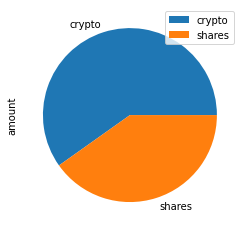

In [103]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount")

In [142]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = df_savings["amount"].sum()
total_savings
# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulation! You have enough savings for emergency.")
elif total_savings == emergency_fund:
    print("Congratulation! You reached emergency financial goal")
else:
    print(f"You need {emergency_fund-total_savings:0.2f} to reach emergency financial goal")
    

Congratulation! You have enough savings for emergency.
105126.6820903


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [115]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-15', tz='America/New_York').isoformat()

In [117]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-15 00:00:00-05:00  109.08  109.1200  108.8300  108.94  3049283   
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-15 00:00:00-05:00  186.77  188.76  185.52  187.78  240958526  
2016-01-19 00:00:00-05:00  189.96  190.11  186.20  188.02  151482568  
2016-01-20 00:00:00-05:00  185.03  188.06  181.02  185.79  245668486  
2016-01-21 00:00:00-05:00  186.21  188.87  184.64  186.68  154918462  
2016-01-22 00:00:00-05:00  189.78  190.76  188.88  190.49  132418951

In [118]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [119]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-15 00:00:00-05:00  109.08  109.1200  108.8300  108.94  3049283   
2016-01-19 00:00:00-05:00  108.85  108.9600  108.7215  108.81  3956197   
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-15 00:00:00-05:00          NaN  186.77  188.76  185.52  187.78   
2016-01-19 00:00:00-05:00    -0.001193  189.96  190.11  186.20  188.02   
2016-01-20 00:00:00-05:00     0.001011  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   

                                                   
                              volume daily_return  
time                                               
2016-01-15 00:00:00-05:00  240958526          NaN  
2016-01-19 00:00:00-05:00  151482568     0.001278  
2016-01-20 00:00:00-05:00  245668486    -0.011860  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409

In [120]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003703,1.001398,1.009806,0.978152,0.994306,1.007042,1.017969,1.008058,1.011243,0.996487,...,1.001396,0.989511,0.996983,0.988027,0.997337,1.000607,1.014052,0.988211,0.999953,0.997266
2,1.007623,0.992293,1.010005,0.980700,0.993548,1.000976,1.016111,1.016928,1.015757,1.002857,...,0.999187,0.987462,0.991592,0.986500,0.998074,0.995612,0.998590,0.996128,0.998863,0.982084
3,1.007187,0.983769,1.006150,0.983358,1.013052,1.006858,1.012235,1.010737,1.014191,1.005041,...,1.006302,0.981705,1.000272,0.986107,1.005789,1.001942,0.995903,0.997701,0.982895,0.982138
4,1.015832,0.982422,0.995803,0.978828,1.007718,1.008358,1.003511,1.007910,1.021904,1.008119,...,1.010123,0.979760,1.007385,0.989292,1.001783,1.003068,1.003799,1.005581,0.989987,0.974759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.719346,4.444877,30.524477,14.439992,14.170742,43.493115,27.381619,18.909265,17.727660,15.620299,...,23.885197,19.450025,37.527606,3.830468,27.033568,7.519243,28.439404,21.495994,32.340538,17.323916
7557,15.577599,4.463266,30.191171,14.449291,14.335752,43.485835,27.315074,18.979751,17.654555,15.527514,...,23.980824,19.559607,37.035396,3.867422,26.770180,7.498365,28.477820,21.724936,32.825683,17.366545
7558,15.450677,4.434067,30.537673,14.326553,14.450175,43.945445,27.172901,19.226878,17.730450,15.305357,...,23.816930,19.546499,36.760782,3.834142,26.568453,7.509873,28.144582,21.578757,33.215933,17.354467
7559,15.430617,4.409307,30.356373,14.440459,14.567596,43.950497,26.885511,19.261234,17.725254,15.515826,...,24.022402,19.788634,37.030039,3.879026,26.541700,7.458172,27.962384,21.551644,32.655739,17.551588


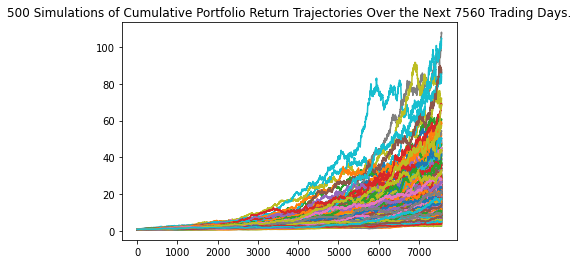

In [121]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30year.plot_simulation()
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

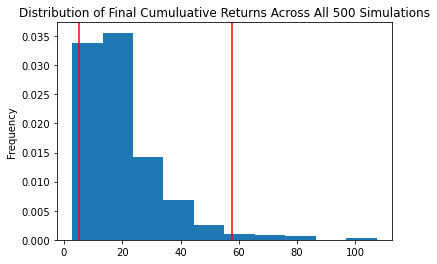

In [122]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30year.plot_distribution()
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [123]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl

count           500.000000
mean             20.014649
std              14.125860
min               2.789724
25%              10.537246
50%              16.040460
75%              25.283130
max             107.289263
95% CI Lower      5.200387
95% CI Upper     57.821007
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [124]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $104007.73 and $1156420.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [125]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $156011.6 and $1734630.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [127]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [128]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004093,1.004534,1.003017,1.002018,0.986145,0.995992,0.993782,1.005132,0.993343,1.004432,...,1.007034,1.004581,1.004296,0.997959,1.000583,1.000559,1.010179,1.009813,0.992073,1.015120
2,1.013520,0.999630,1.000493,1.006379,0.986669,0.983678,0.996483,0.996581,0.994169,1.000185,...,1.020283,1.005442,1.009125,1.003744,0.998139,0.984996,1.016079,1.012090,0.996365,1.024327
3,1.010543,1.004489,1.000036,0.992278,0.971686,0.985232,0.989237,0.991690,0.998577,1.010013,...,1.023431,1.021978,1.005342,1.002698,1.001748,0.982149,1.020475,1.003770,0.995948,1.025567
4,1.009065,0.989950,0.995053,0.991804,0.971867,0.981375,0.984464,0.983008,0.996412,1.004406,...,1.026167,1.024214,1.007257,1.000802,1.005333,0.988934,1.016596,1.002999,0.998791,1.020553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.448281,2.413550,1.910398,0.991714,1.801386,1.920933,1.071765,2.743544,0.847552,1.666216,...,2.307395,0.935124,1.386469,1.120033,1.964484,1.650865,2.468077,0.829343,1.570653,1.601477
1257,1.440448,2.391145,1.930303,0.997798,1.796874,1.927203,1.064104,2.751335,0.841379,1.658541,...,2.314510,0.944038,1.387287,1.120046,1.983349,1.640437,2.466274,0.828462,1.573826,1.577125
1258,1.450834,2.380546,1.924952,0.998547,1.784039,1.949128,1.055476,2.776336,0.836340,1.663013,...,2.300319,0.943722,1.390906,1.111552,1.994524,1.645787,2.457572,0.825420,1.569191,1.569514
1259,1.435546,2.393160,1.913182,0.987716,1.764894,1.946832,1.047942,2.761199,0.844018,1.674186,...,2.285137,0.938540,1.392046,1.108432,1.987182,1.656560,2.415897,0.826521,1.552125,1.585332


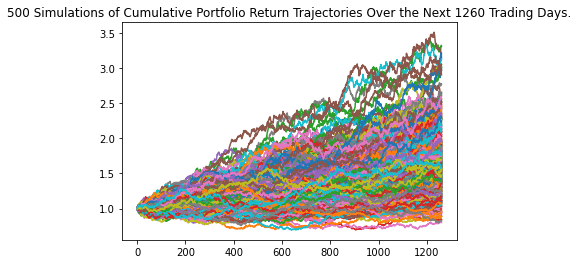

In [129]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_5year.plot_simulation()

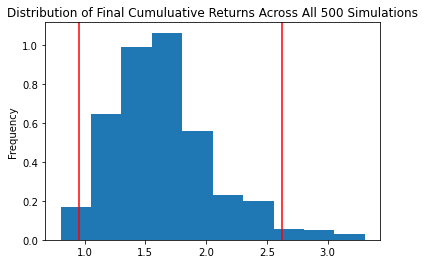

In [130]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_5year.plot_distribution()

In [132]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_5year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl

count           500.000000
mean              1.640429
std               0.426520
min               0.801750
25%               1.352060
50%               1.591855
75%               1.840400
max               3.306345
95% CI Lower      0.955976
95% CI Upper      2.622265
Name: 1260, dtype: float64

In [133]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57358.56 and $157335.89


### Ten Years Retirement Option

In [134]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [135]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006895,0.994992,1.001626,1.003361,1.005677,1.013029,0.992716,0.995271,0.992173,1.006905,...,0.991391,0.986690,1.004693,1.001323,1.006368,1.004352,0.999708,0.996030,1.011494,1.000645
2,1.006501,1.002580,0.999941,0.997074,1.006130,1.014569,0.991411,0.987754,0.997732,1.019167,...,0.989940,0.978311,0.992523,1.009159,1.001314,1.015649,0.992694,0.993470,1.015501,0.996835
3,1.004147,1.002224,1.011429,0.998704,0.997928,1.017954,0.997629,0.983559,0.993846,1.011843,...,0.990169,0.988265,1.000474,1.019328,1.008678,1.016795,0.987991,0.998573,1.024576,1.001515
4,1.004391,1.002985,1.011526,1.006513,0.992969,1.003314,0.996771,0.989577,0.992416,1.017045,...,0.993911,0.984387,0.997066,1.016591,1.012401,1.013383,0.996923,0.993613,1.025238,1.004602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.414308,1.839335,2.423327,2.793704,3.155739,5.885486,3.404236,1.790601,2.278638,2.232351,...,1.868545,1.858186,3.623620,4.859967,1.372893,2.777938,1.748799,2.173460,1.761528,4.825512
2517,2.405229,1.841482,2.412424,2.819562,3.146184,5.963975,3.386358,1.784087,2.280032,2.214486,...,1.876266,1.864362,3.611765,4.907107,1.365375,2.771540,1.754087,2.167366,1.775499,4.802743
2518,2.391085,1.842292,2.403601,2.790412,3.126178,6.000940,3.413419,1.773977,2.284808,2.207963,...,1.862637,1.864173,3.623320,4.922162,1.376155,2.764565,1.734779,2.181928,1.777892,4.907629
2519,2.401211,1.853095,2.404513,2.775515,3.105697,6.013670,3.397810,1.774244,2.285257,2.189498,...,1.856329,1.866725,3.639122,4.944482,1.343058,2.763096,1.742226,2.194546,1.813374,4.943352


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

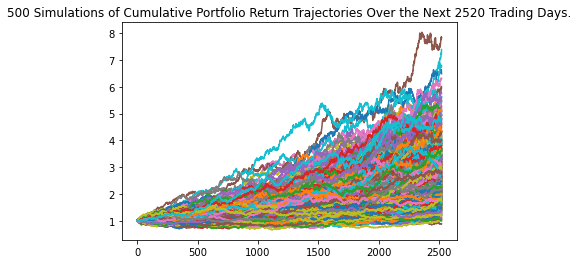

In [137]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_10year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

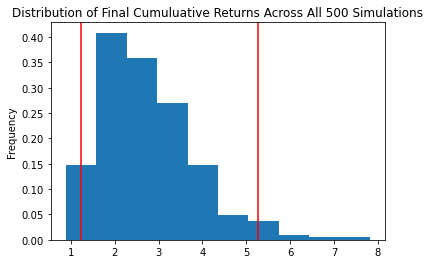

In [138]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_10year.plot_distribution()

In [140]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10 = MC_10year.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
tbl_10

count           500.000000
mean              2.747466
std               1.071125
min               0.879463
25%               1.973146
50%               2.567910
75%               3.329478
max               7.827774
95% CI Lower      1.218677
95% CI Upper      5.262587
Name: 2520, dtype: float64

In [141]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_10[8]*initial_investment,2)
ci_upper_ten = round(tbl_10[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73120.61 and $315755.23
